# VAR supply and demand shock analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import warnings

warnings.filterwarnings("ignore")

import sys
sys.path.append('../')
from utils import *

## Data Loading

In [2]:
data_URL = 'https://www.ssb.no/statbank/sq/10085910'

salmon_data = import_salmon_data(data_URL, rename_cols=True)['Price']

# Supply commodity data from yahoo finance
commodity_data = yf.download(
    ['LE=F', 'HE=F', 'ZW=F', 'ZS=F'],
    start=salmon_data.index[0], 
    end=salmon_data.index[-1], 
    interval='1wk', 
    progress=False
)['Adj Close']

data = pd.concat(
    [
        salmon_data, 
        commodity_data.reindex(salmon_data.index)
    ],
    axis=1
).dropna().rename(
    columns={
        'LE=F': 'Cattle', 
        'HE=F': 'Pork', 
        'ZW=F': 'Wheat', 
        'ZS=F': 'Soybean', 
        'Price': 'Salmon'
    }
)

display(data.head())

log_yields = np.log(data).diff().dropna()

display(data.head())


,Salmon,Pork,Cattle,Soybean,Wheat
Date,,,,,
2002-03-04,22.73,58.049999,75.500000,451.00,272.00
2002-03-11,23.05,55.075001,73.000000,467.50,279.00
2002-03-18,23.57,52.950001,69.775002,461.25,281.50
2002-03-25,23.94,51.875000,70.425003,473.50,294.50
2002-04-01,23.79,45.974998,68.675003,460.50,278.75


,Salmon,Pork,Cattle,Soybean,Wheat
Date,,,,,
2002-03-04,22.73,58.049999,75.500000,451.00,272.00
2002-03-11,23.05,55.075001,73.000000,467.50,279.00
2002-03-18,23.57,52.950001,69.775002,461.25,281.50
2002-03-25,23.94,51.875000,70.425003,473.50,294.50
2002-04-01,23.79,45.974998,68.675003,460.50,278.75


## Supply and demand shock analysis

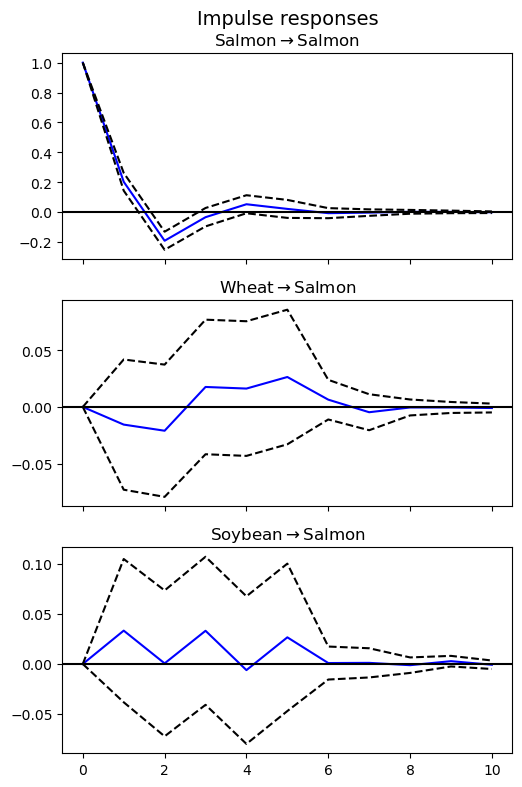

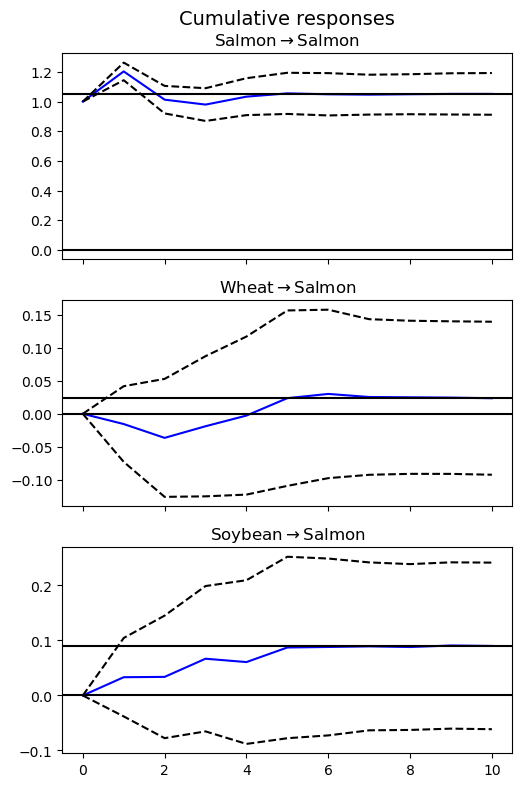

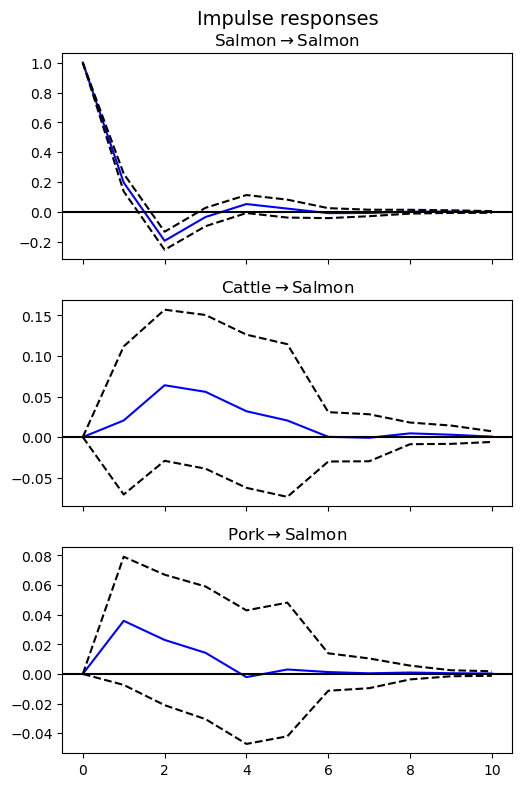

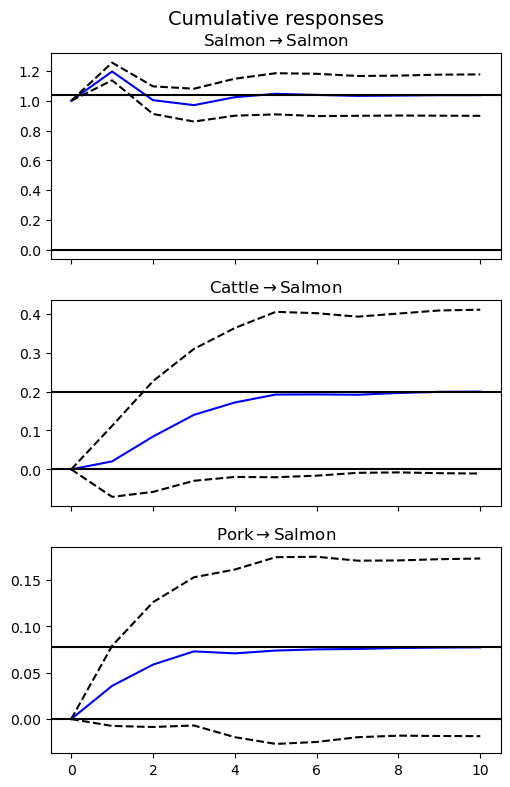

In [3]:

log_yields = np.log(data[['Salmon', 'Wheat', 'Soybean']]).diff().dropna()

VAR_model = VAR(log_yields)

lag_order = 5

results = VAR_model.fit(lag_order)

irf = results.irf(periods=10)
irf.plot(orth=False, response='Salmon', figsize=(5, 8));

irf.plot_cum_effects(orth=False, response='Salmon', figsize=(5, 8));



log_yields = np.log(data[['Salmon', 'Cattle', 'Pork']]).diff().dropna()

VAR_model = VAR(log_yields)

lag_order = 5
results = VAR_model.fit(lag_order)

irf = results.irf(periods=10)
irf.plot(orth=False, response='Salmon', figsize=(5, 8));

irf.plot_cum_effects(orth=False, response='Salmon', figsize=(5, 8));